In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data sets
train=pd.read_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\train.csv')
train.head()

test = pd.read_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\test.csv')
sample_sub = pd.read_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\sample_submission.csv')


#size of the data
print('Shape of the train data set is : ',train.shape)

print('Shape of the test data set is : ' , test.shape)

Shape of the train data set is :  (54808, 14)
Shape of the test data set is :  (23490, 13)


In [3]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [4]:
#checking out the correlation between varous columns and target(is_promoted) column
corr=train.corr()
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [5]:
cols=corr.columns[:-1]
(cols.size)

8

In [6]:
#combining the corellation values with the respective colums 
corr_list = [abs(corr[attr]['is_promoted']) for attr in cols ]
lables=cols

print(corr_list)
print(lables)

corr_order=list(zip(corr_list,lables))
corr_order

[0.0012058461172558094, 0.024895917682445683, 0.017165891678935525, 0.15932012043564767, 0.010669866544738065, 0.22158153967699584, 0.1958709963666206, 0.18114671957890244]
Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')


[(0.0012058461172558094, 'employee_id'),
 (0.024895917682445683, 'no_of_trainings'),
 (0.017165891678935525, 'age'),
 (0.15932012043564767, 'previous_year_rating'),
 (0.010669866544738065, 'length_of_service'),
 (0.22158153967699584, 'KPIs_met >80%'),
 (0.1958709963666206, 'awards_won?'),
 (0.18114671957890244, 'avg_training_score')]

In [8]:
corr_order.sort(reverse=True)
corr_order

[(0.22158153967699584, 'KPIs_met >80%'),
 (0.1958709963666206, 'awards_won?'),
 (0.18114671957890244, 'avg_training_score'),
 (0.15932012043564767, 'previous_year_rating'),
 (0.024895917682445683, 'no_of_trainings'),
 (0.017165891678935525, 'age'),
 (0.010669866544738065, 'length_of_service'),
 (0.0012058461172558094, 'employee_id')]

In [9]:
#saparating the columns and values after sorting
corr , labels = list(zip(*corr_order))
print(corr)
print(labels)

(0.22158153967699584, 0.1958709963666206, 0.18114671957890244, 0.15932012043564767, 0.024895917682445683, 0.017165891678935525, 0.010669866544738065, 0.0012058461172558094)
('KPIs_met >80%', 'awards_won?', 'avg_training_score', 'previous_year_rating', 'no_of_trainings', 'age', 'length_of_service', 'employee_id')


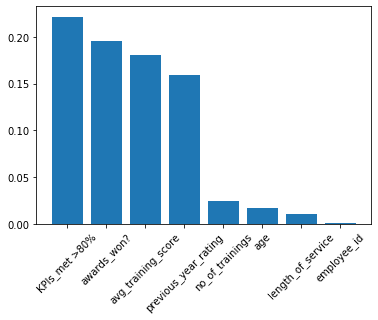

In [11]:
# Plottng the correlated columns 

fig , ax = plt.subplots()
ax.bar(labels, corr)
plt.xticks(rotation=45)
plt.show()

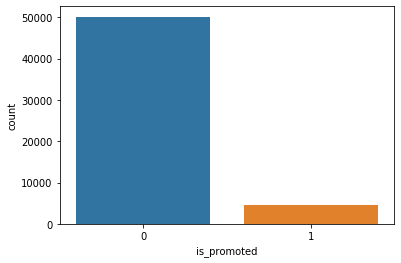

In [22]:
fig , ax = plt.subplots()
sns.countplot(train.is_promoted)
plt.show()

In [24]:
ax?

In [8]:
## remove the target variable from the training data
y1=train.is_promoted.values
y2=train.is_promoted
print('y1 is of type: ',type(y1))
print('y2 is of type: ',type(y2))
# drop the target column namely is_promoted
train.drop('is_promoted',axis=1 , inplace=True)

y1 is of type:  <class 'numpy.ndarray'>
y2 is of type:  <class 'pandas.core.series.Series'>


In [9]:
#concatenate test and train for mutual preprocessing
data=pd.concat([train,test],axis = 0)

print(data.shape)

data.head()

(78298, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


# Dropping some columns

In [17]:
# dropping the least correlated columns
# data.drop(['no_of_trainings','age','length_of_service'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 8.4+ MB


In [10]:
#check the nan values
data.isna().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
data.previous_year_rating.value_counts()
data.previous_year_rating.mode()

0    3.0
dtype: float64

In [12]:
data['education'].fillna("Bachelor's",inplace=True)

data.previous_year_rating.fillna(3.0,inplace=True)
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [13]:
# extracting the employee_id and removing it from the data as it is not important as of now
employee_id = data.employee_id.iloc[:]
employee_id.ilco[:54808]

0        65438
1        65141
2         7513
3         2542
4        48945
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 78298, dtype: int64

In [14]:
#drop the employee id column
data.drop('employee_id',axis=1,inplace=True)

In [15]:
data.info()
data.select_dtypes('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            78298 non-null  object 
 1   region                78298 non-null  object 
 2   education             78298 non-null  object 
 3   gender                78298 non-null  object 
 4   recruitment_channel   78298 non-null  object 
 5   no_of_trainings       78298 non-null  int64  
 6   age                   78298 non-null  int64  
 7   previous_year_rating  78298 non-null  float64
 8   length_of_service     78298 non-null  int64  
 9   KPIs_met >80%         78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 7.8+ MB


,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,35,8,1,0,49
1,1,30,4,0,0,60
2,1,34,7,0,0,50
3,2,39,10,0,0,50
4,1,45,2,0,0,73
...,...,...,...,...,...,...
23485,1,24,1,0,0,61
23486,1,31,7,0,0,74
23487,1,26,4,0,0,50
23488,3,27,1,0,0,70


In [19]:
# convering the 'object' column into category type

cols=data.select_dtypes(include='object').columns

for i in cols:
    data=data.astype({i:'category'})

In [17]:
# convering some of the 'int64' column into category type
# col_int=data.select_dtypes(include='int64').columns.to_list()
# col_int[:-1]

# for i in col_int[:-1]:
#     data=data.astype({i:'category'})

data = data.astype({'KPIs_met >80%':'category' , 'awards_won?':'category' })

data = data.astype({'previous_year_rating': 'category'})

In [56]:
data.drop('length_of_service',axis=1,inplace=True)

# applying one hot encoding to data

In [57]:
#applying one hot encoding to data 
data_dum = pd.get_dummies(data,drop_first=True)
data_dum.describe(include=['int64','float'])

,no_of_trainings,age,avg_training_score
count,78298.000000,78298.000000,78298.000000
mean,1.253378,34.797619,63.349664
std,0.606766,7.665928,13.383664
min,1.000000,20.000000,39.000000
25%,1.000000,29.000000,51.000000
50%,1.000000,33.000000,60.000000
75%,1.000000,39.000000,76.000000
max,10.000000,60.000000,99.000000


In [58]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   no_of_trainings               78298 non-null  int64
 1   age                           78298 non-null  int64
 2   avg_training_score            78298 non-null  int64
 3   department_Finance            78298 non-null  uint8
 4   department_HR                 78298 non-null  uint8
 5   department_Legal              78298 non-null  uint8
 6   department_Operations         78298 non-null  uint8
 7   department_Procurement        78298 non-null  uint8
 8   department_R&D                78298 non-null  uint8
 9   department_Sales & Marketing  78298 non-null  uint8
 10  department_Technology         78298 non-null  uint8
 11  region_region_10              78298 non-null  uint8
 12  region_region_11              78298 non-null  uint8
 13  region_region_12              7

# split the data_dum

In [59]:
#split the data_dum

train_dum = data_dum[:54808]
test_dum = data_dum[54808:]


# train_dum.info()
X=train_dum.values

In [60]:
#target variable
y1.size

54808

# Model Training

# XG Boost


In [61]:
from xgboost import XGBClassifier


#instantiate model and train
model = XGBClassifier()
model.fit(X, y1)

y_XGB = model.predict(test_dum.values)

In [63]:
#saving the result into data frame

y_XGB_pred = pd.DataFrame(employee_id.iloc[54808:] , columns = ['employee_id'])
y_XGB_pred["is_promoted"] = y_XGB

# y_XGB.is_promoted.value_counts()

y_XGB_pred.to_csv(r"D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_pred_XGB_los_dropped.csv" , index=False)

In [55]:
y_XGB_pred['is_promoted'].value_counts()

0    22976
1      514
Name: is_promoted, dtype: int64

# Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X,y1)

y_randomforest = rf_clf.predict(test_dum)


In [32]:
y_randomforest.size

23490

In [64]:
#saving the result into data frame

y_rf = pd.DataFrame(employee_id.iloc[54808:] , columns = ['employee_id'])
y_rf["is_promoted"] = y_randomforest

# y_rf.is_promoted.value_counts()

y_rf.to_csv(r"D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_pred_RandomForest_los.csv" , index=False)

## DecisionTreeClassifier

In [57]:
data_dum.select_dtypes(include='object')

""
0
1
2
3
4
...
23485
23486
23487
23488


In [63]:
data_dum

,no_of_trainings,age,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,1,35,8,49,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1,1,30,4,60,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,34,7,50,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3,2,39,10,50,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,45,2,73,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,24,1,61,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
23486,1,31,7,74,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
23487,1,26,4,50,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
23488,3,27,1,70,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0


In [64]:
#scaling the features

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((StandardScaler(), ['no_of_trainings', 'age','length_of_service','avg_training_score']),
                                      remainder='passthrough')


column_trans.fit_transform(train_dum)


array([[-0.41527615,  0.02559817,  0.50045956, ...,  1.        ,
         1.        ,  0.        ],
       [-0.41527615, -0.62713488, -0.43739464, ...,  1.        ,
         0.        ,  0.        ],
       [-0.41527615, -0.10494844,  0.26599601, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.41527615, -1.01877471, -0.67185819, ...,  1.        ,
         1.        ,  0.        ],
       [-0.41527615, -0.75768149, -0.90632174, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41527615, -1.01877471, -0.20293109, ...,  0.        ,
         0.        ,  0.        ]])

In [83]:
train_dum

,no_of_trainings,age,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,1,35,8,49,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1,1,30,4,60,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,34,7,50,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3,2,39,10,50,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,45,2,73,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,17,78,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
54804,1,37,6,56,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
54805,1,27,3,79,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
54806,1,29,2,45,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [82]:
ss = StandardScaler()

ss.fit_transform(train_dum[['no_of_trainings', 'age','length_of_service','avg_training_score']])


array([[-0.41527615,  0.02559817,  0.50045956, -1.07593145],
       [-0.41527615, -0.62713488, -0.43739464, -0.25328242],
       [-0.41527615, -0.10494844,  0.26599601, -1.00114517],
       ...,
       [-0.41527615, -1.01877471, -0.67185819,  1.1676568 ],
       [-0.41527615, -0.75768149, -0.90632174, -1.37507655],
       [-0.41527615, -1.01877471, -0.20293109, -1.07593145]])

In [78]:
# making the pipe line
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(column_trans , DecisionTreeClassifier)

pipe.fit(train_dum,train['is_promoted'])

TypeError: fit() missing 1 required positional argument: 'y'

In [41]:
#model training

from sklearn.tree import DecisionTreeClassifier

clf  = DecisionTreeClassifier()

clf.fit(X,y1)



### getting the predictions ready
y_predict_corr_Dtree = clf.predict(test_dum)


#making the data frame
y_predict= pd.DataFrame(employee_id[54808:], columns=['employee_id'],index=None)

y_predict['is_promoted']=y_predict_corr_Dtree
y_predict

#save the prediction into csv file

y_predict.to_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_predict_corr_Dtree.csv',index=False)

## SVM   --->> f1 score =0

In [40]:
# from sklearn.svm import SVC

# clf_svm =    SVC()  

# clf_svm.fit(X,y1)


# ### getting the predictions ready
# y_SVM_p = clf_svm.predict(test_dum)


# #making the data frame
# y_SVM= pd.DataFrame(employee_id[54808:], columns=['employee_id'],index=None)

# y_SVM['is_promoted']=y_SVM_p
# y_SVM

# #save the prediction into csv file

# y_SVM.to_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_SVM.csv',index=False)

# Using the approach of scaling(Both) numerical features

In [47]:
# print(train_dum.var())
# print(test_dum.var())

In [102]:
# importing scaling library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols=['previous_year_rating']
train_dum[cols] = scaler.fit_transform(train_dum[cols])

# train_dum

#doing same thing for test_dum


test_dum[cols] = scaler.fit_transform(test_dum[cols])

test_dum

# test_dum[cols].var()


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

previous_year_rating    1.000043
avg_training_score      1.000043
dtype: float64

In [61]:
# num_cols = train.columns[train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# num_cols

# Training the model with scaled  numerical features

In [87]:
# model selected DTreeClassifier

X_scaled=train_dum.values
# y1

from sklearn.tree import DecisionTreeClassifier

clf_scaled = DecisionTreeClassifier()

clf_scaled.fit(X_scaled,y1)

# Making prediction on scaled numerical columns and correlation also used

y_pred_scaled_corr = clf_scaled.predict(test_dum)

#Making dataframe
y_psc = pd.DataFrame(employee_id[54808:] , columns=['employee_id'])

y_psc['is_promoted'] = y_pred_scaled_corr

y_psc.head()

print(type(employee_id))
print(type(y1))

# saving the data frame

y_psc.to_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_pred_scaled_corr.csv',index=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# KNN performed vary poor

In [95]:
# # model selected knn
# from sklearn.neighbors import KNeighborsClassifier

# knn_scaled = KNeighborsClassifier(n_neighbors=5)

# knn_scaled.fit(X_scaled,y1)

# y_knn_scaled = knn_scaled.predict(test_dum)

# y_knn = pd.DataFrame(employee_id[54808:] , columns=['employee_id'])

# y_knn['is_promoted'] = y_knn_scaled

# y_knn.head()

# y_knn.to_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_pred_scaled_corr_KNN.csv',index=False)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# Using the approach of scaling(Only avg_training_score) numerical feature

In [100]:
data_dum

,previous_year_rating,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,KPIs_met >80%_1,awards_won?_1
0,1.326042,49,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,1.326042,60,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.261293,50,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,-1.848628,50,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.261293,73,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,-0.267419,61,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
23486,-0.267419,74,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
23487,0.523325,50,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23488,0.523325,70,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [99]:
#split the data_dum

train_dum = data_dum[:54808]
test_dum = data_dum[54808:]

train_dum.previous_year_rating.unique()

array([ 1.32604219, -0.26129281, -1.84862781,  0.53237469, -1.05496031])

In [103]:
# appying the inverse transform on the same columns
cols=['previous_year_rating','avg_training_score']
train_dum[cols] = scaler.inverse_transform(train_dum[cols])


print(train_dum[cols].var())

#doing same thing for test_dum

cols=['previous_year_rating','avg_training_score']
test_dum[cols] = scaler.inverse_transform(test_dum[cols])

# test_dum

print(test_dum[cols].var())


previous_year_rating      1.000018
avg_training_score      179.870654
dtype: float64
previous_year_rating      1.000043
avg_training_score      179.875030
dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [106]:
train_dum['avg_training_score'] = scaler.fit_transform(train_dum[['avg_training_score']])

test_dum['avg_training_score'] =scaler.fit_transform(test_dum[['avg_training_score']])



print(train_dum[cols].var())
print(test_dum[cols].var())


previous_year_rating    1.000018
avg_training_score      1.000018
dtype: float64
previous_year_rating    1.000043
avg_training_score      1.000043
dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# only 'avg_training_score '  is scaled    

In [107]:
# model selected DTreeClassifier

X_scaled_ats=train_dum.values
# y1

from sklearn.tree import DecisionTreeClassifier

clf_scaled_ats = DecisionTreeClassifier()

clf_scaled_ats.fit(X_scaled_ats,y1)

# Making prediction on scaled numerical columns and correlation also used

y_pred_scaled_corr_ats = clf_scaled.predict(test_dum)

#Making dataframe
y_psc_ats = pd.DataFrame(employee_id[54808:] , columns=['employee_id'])

y_psc_ats['is_promoted'] = y_pred_scaled_corr_ats

y_psc_ats.head()

# print(type(employee_id))
# print(type(y1))

# saving the data frame

y_psc_ats.to_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_pred_scaled_corr_ATS.csv',index=False)

# Using the dropped column 

In [148]:
# train[['no_of_trainings', 'age','length_of_service']]
train.no_of_trainings.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        2
4        1
        ..
54803    1
54804    1
54805    1
54806    1
54807    1
Name: no_of_trainings, Length: 54808, dtype: int64>

In [149]:
data_dum[['no_of_trainings', 'age','length_of_service']] = train[['no_of_trainings', 'age','length_of_service']]
                                                                                     

In [153]:
data_dum.columns


Index(['avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 'region_region_8',
       'region_region_9', 'education_Below Secondary',
       

In [152]:
data_dum.length_of_service.value_counts()

3     10058
4      9796
2      9505
5      8380
7      7900
6      6726
1      6530
8      4093
9      3757
10     3119
11     1328
12     1147
13      957
15      851
16      780
14      771
17      624
18      565
19      477
20      189
21      117
23       95
22       91
24       87
25       76
26       60
27       52
28       42
29       40
31       30
30       18
33       14
32       14
34        8
37        1
Name: length_of_service, dtype: int64

In [151]:
data_dum.no_of_trainings.value_counts()

1     63409
2     11429
3      2501
4       674
5       182
6        65
7        16
8         9
9         7
10        6
Name: no_of_trainings, dtype: int64

In [125]:
# data_dum.drop(['no_of_trainings', 'age','length_of_service'],inplace=True,axis=1)

In [132]:
# data.select_dtypes(exclude='category')

# data = data.astype({'previous_year_rating':'category'})

data_dum = pd.get_dummies(data,drop_first=True)

In [135]:
data_dum.shape

#split the data_dum

train_dum = data_dum[:54808]
test_dum = data_dum[54808:]


# train_dum.info()
X=train_dum.values



In [137]:
print(train_dum.shape)
print(test_dum.shape)

(54808, 53)
(23490, 53)


# Model Selection

In [138]:
#model training

from sklearn.tree import DecisionTreeClassifier

clf  = DecisionTreeClassifier()

clf.fit(X,y1)



### getting the predictions ready
y_predict_CDT= clf.predict(test_dum)


#making the data frame
y_predict= pd.DataFrame(employee_id[54808:], columns=['employee_id'],index=None)

y_predict['is_promoted']=y_predict_CDT
y_predict

#save the prediction into csv file

y_predict.to_csv(r'D:\Users\iahuj\Downloads\HR Analytics Challenge Analytics vidhya\Solution\y_predict_CDT.csv',index=False)